# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Reading the csv file

In [2]:
df=pd.read_csv("HOUSING_DATASET.csv")

In [3]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,WoodDeckSF,OpenPorchSF,TotalBsmtSF,FloorSF,SalePrice
0,60,65.0,8450,7,0,61,856,104678.0,208500
1,20,80.0,9600,6,298,0,1262,91381.0,181500
2,60,68.0,11250,7,0,42,920,112210.0,223500
3,70,60.0,9550,7,0,35,756,70378.0,140000
4,60,84.0,14260,8,192,84,1145,125572.5,250000


# Cleaning the data

In [4]:
df.isnull().sum()

MSSubClass       0
LotFrontage    259
LotArea          0
OverallQual      0
WoodDeckSF       0
OpenPorchSF      0
TotalBsmtSF      0
FloorSF          0
SalePrice        0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
WoodDeckSF     0
OpenPorchSF    0
TotalBsmtSF    0
FloorSF        0
SalePrice      0
dtype: int64

now data is cleaned

# Plotting the graph

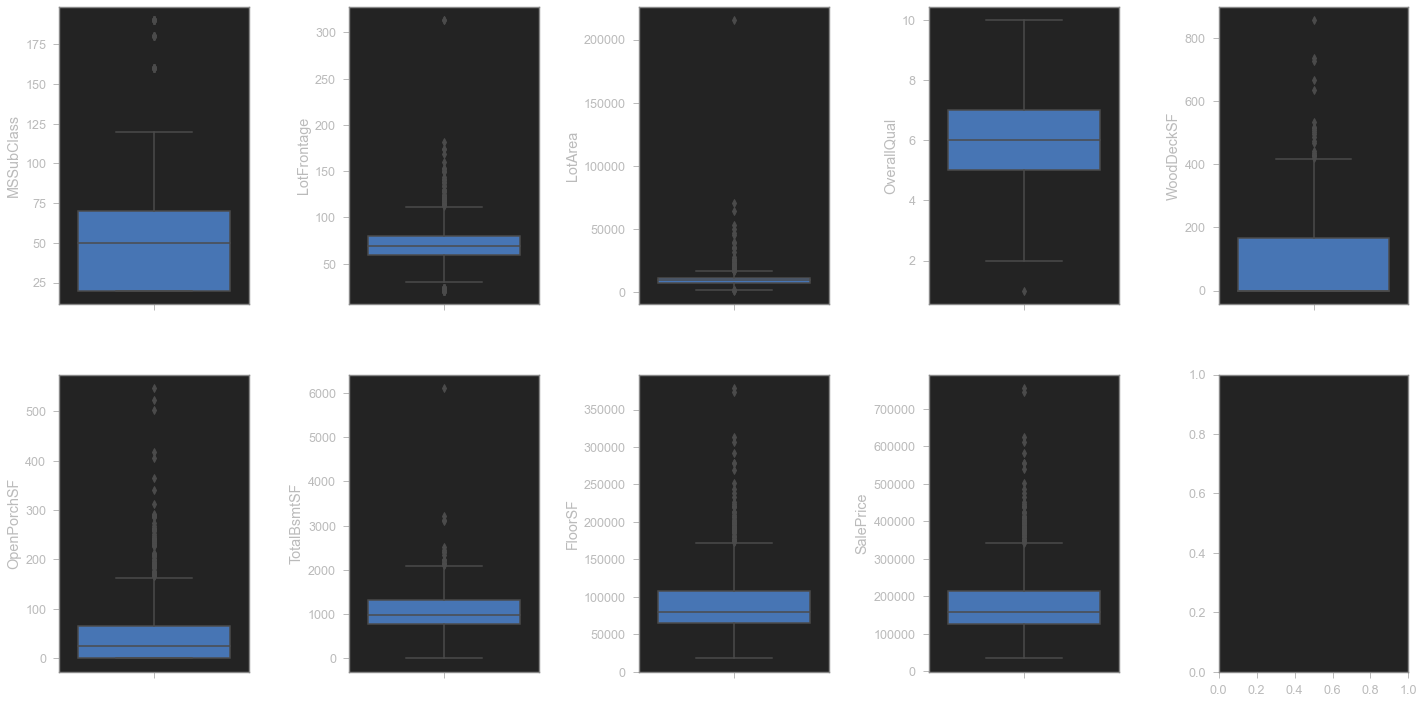

In [7]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax = ax[index])
    index += 1
plt.tight_layout(pad= 1.5, w_pad=2.7, h_pad=6.0)

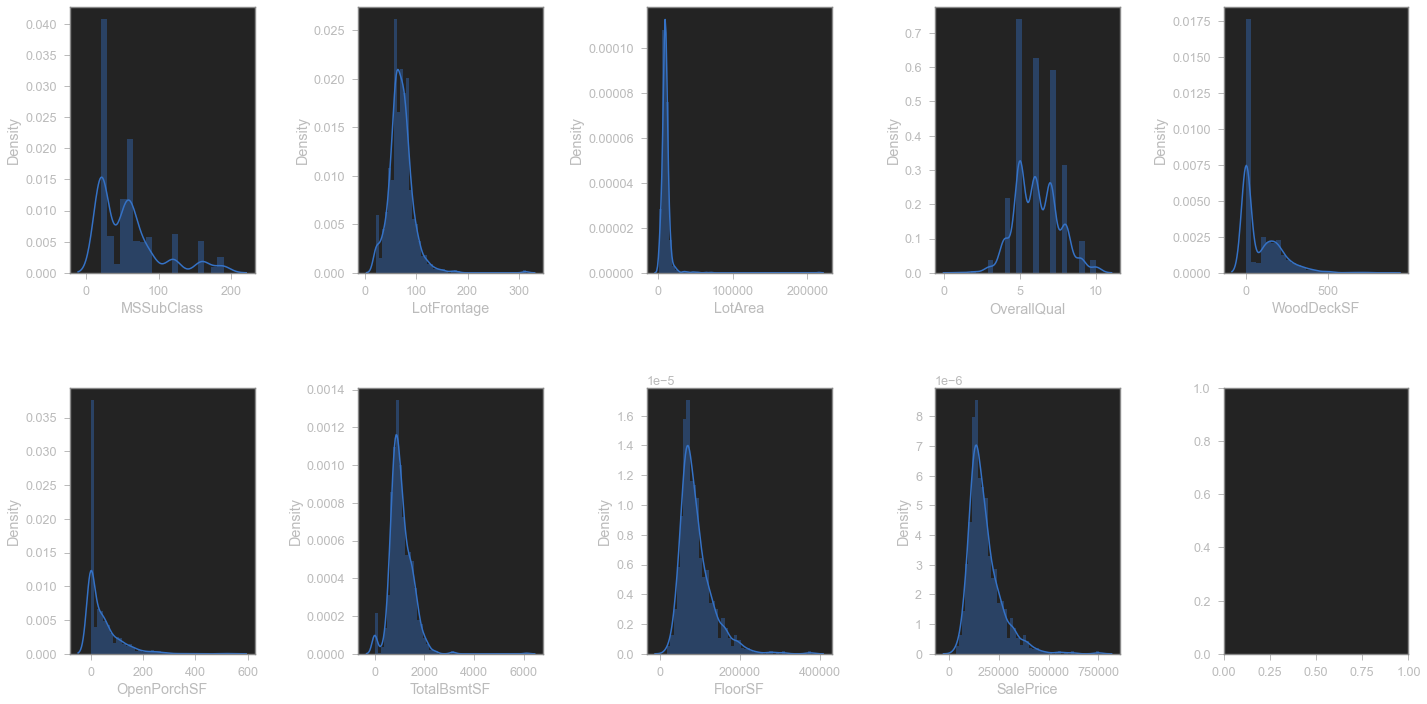

In [8]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax = ax[index])
    index += 1
plt.tight_layout(pad= 1.5, w_pad=2.7, h_pad=6.0)

# Splitting the data

In [9]:

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8,
test_size = 0.2, random_state = 32) # here test size is 20% of
# original dataset


# Training the model and predicting

In [10]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize= True)


model.fit(df_train.drop(columns=['SalePrice'], axis=1), df_train.SalePrice)
    
pred = model.predict(df_test.drop(columns=['SalePrice'], axis=1))
    
    
print("Model Report")
print("MSE:", mean_squared_error(df_test['SalePrice'].values, pred))
    

Model Report
MSE: 2.478603801956405e-20
